# 配置基础环境

In [1]:
import akshare as ak
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'STKAITI'
plt.rcParams['axes.unicode_minus'] = False
# 关闭警告信息
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 获取上证指数数据
index_code = 'sh000001'
start_date = pd.to_datetime('2014-01-01')
end_date = pd.to_datetime('2023-12-31')
price_df = ak.stock_zh_index_daily(symbol=index_code)
price_df['date'] = pd.to_datetime(price_df['date'])
price_df = price_df[(price_df['date'] >= start_date) & (price_df['date'] <= end_date)]
price_df = price_df.sort_values('date').set_index('date')

In [3]:
# 计算每日收益率
price_df['returns'] = price_df['close'].pct_change().shift(-1).fillna(0)
price_df

,open,high,low,close,volume,returns
date,,,,,,
2014-01-02,2112.126,2113.110,2101.016,2109.387,6848548800,-0.012445
2014-01-03,2101.542,2102.167,2075.899,2083.136,8449724000,-0.017967
2014-01-06,2078.684,2078.684,2034.006,2045.709,8958760800,0.000786
2014-01-07,2034.224,2052.279,2029.246,2047.317,6340293600,-0.001454
2014-01-08,2047.256,2062.952,2037.110,2044.340,7164736000,-0.008178
...,...,...,...,...,...,...
2023-12-25,2909.875,2920.632,2903.987,2918.813,22981417800,-0.006829
2023-12-26,2917.971,2917.971,2892.837,2898.879,22814085500,0.005428
2023-12-27,2900.149,2917.956,2890.165,2914.614,24790088200,0.013755


# 布林带

In [30]:
# 计算布林带
length = 20
std = 2.0
mamode = 'sma'
channel = ta.bbands(price_df['close'], length=length, std=std, mamode=mamode)
channel

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN
2014-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-12-25,2885.519125,2970.21240,3054.905675,5.702843,0.196556
2023-12-26,2879.196430,2963.22860,3047.260770,5.671663,0.117113
2023-12-27,2875.802066,2957.87495,3039.947834,5.549449,0.236448


# 肯特纳通道

In [12]:
# 计算肯特纳通道
length = 20
scalar = 2
mamode = 'ema'
channel = ta.kc(price_df['high'], price_df['low'], price_df['close'], length=length, scalar=scalar, mamode=mamode)
channel

,KCLe_20_2.0,KCBe_20_2.0,KCUe_20_2.0
date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN
2014-01-08,NaN,NaN,NaN
...,...,...,...
2023-12-25,2903.644470,2962.560249,3021.476028
2023-12-26,2898.242806,2956.495368,3014.747930
2023-12-27,2894.508444,2952.506666,3010.504889


# 唐奇安通道

In [14]:
# 计算唐奇安通道
length = 20
channel = ta.donchian(price_df['high'], price_df['low'], lower_length=length, upper_length=length)
channel

,DCL_20_20,DCM_20_20,DCU_20_20
date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN
2014-01-08,NaN,NaN,NaN
...,...,...,...
2023-12-25,2882.02,2960.8575,3039.695
2023-12-26,2882.02,2960.4995,3038.979
2023-12-27,2882.02,2960.4995,3038.979


# 霍尔特-温特通道

In [17]:
# 计算霍尔特-温特通道
channel = ta.hwc(price_df['close'])
channel

,HWM,HWU,HWL
date,,,
2014-01-02,2109.387000,2109.387000,2109.387000
2014-01-03,2103.585529,2103.585529,2103.585529
2014-01-06,2090.193799,2090.193799,2090.193799
2014-01-07,2078.742430,2085.209139,2072.275721
2014-01-08,2068.023855,2083.370719,2052.676991
...,...,...,...
2023-12-25,2890.198387,2915.534329,2864.862446
2023-12-26,2880.072812,2904.732247,2855.413376
2023-12-27,2875.263075,2900.346108,2850.180041


# 加速带

In [19]:
# 计算加速带
length = 20
mamode = 'sma'
channel = ta.accbands(price_df['high'], price_df['low'], price_df['close'], length=length, mamode=mamode)
channel

,ACCBL_20,ACCBM_20,ACCBU_20
date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN
2014-01-08,NaN,NaN,NaN
...,...,...,...
2023-12-25,2899.865744,2970.21240,3043.298244
2023-12-26,2892.933664,2963.22860,3037.783664
2023-12-27,2885.917160,2957.87495,3032.385910


# 可视化输出

<Axes: xlabel='date'>

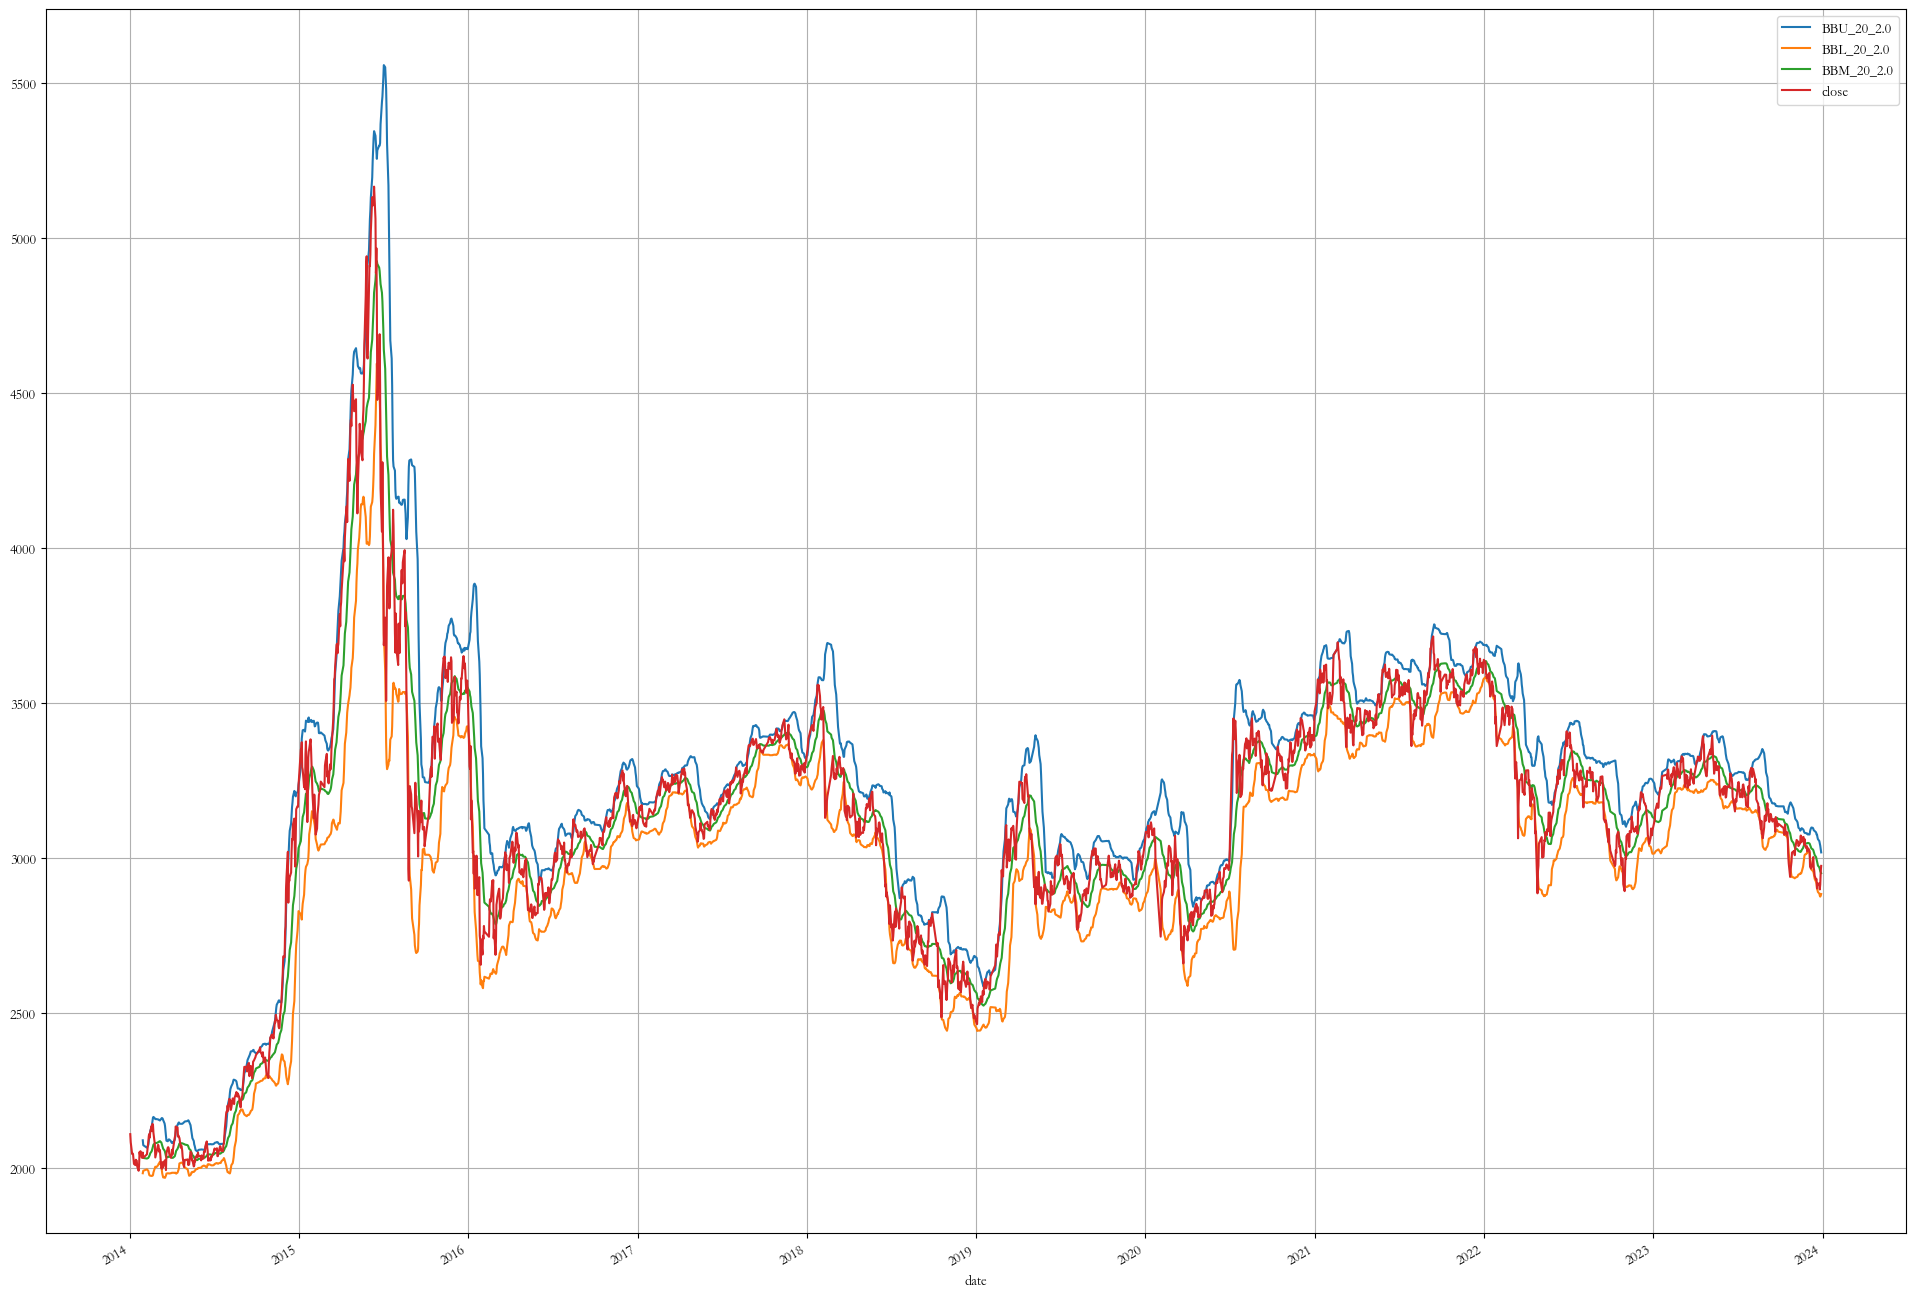

In [31]:
# 可视化输出通道
up = 'BBU_20_2.0'
down = 'BBL_20_2.0'
middle = 'BBM_20_2.0'
channel = channel.join(price_df['close'], how='left')
channel[[up, down, middle, 'close']].plot(figsize=(24, 18), grid=True)

# 通道择时策略

In [33]:
# 计算择时信号：价格突破通道上轨时开仓，价格跌破通道下轨时清仓，价格在通道内时维持先前的仓位
timing_df = pd.DataFrame()
timing_df['择时'] = (price_df['close'] >= channel[up]) * 1. + (price_df['close'] <= channel[down]) * -1.
timing_df = timing_df.replace(0, np.nan)
timing_df = timing_df.fillna(method='ffill').fillna(0)
timing_df[timing_df < 0] = 0
timing_df['不择时'] = 1.

In [34]:
# 计算择时效果
timing_ret = timing_df.mul(price_df['returns'], axis=0)
timing_ret['超额收益'] = (1 + timing_ret['择时']).div(1 + timing_ret['不择时'], axis=0) - 1.

In [35]:
# 计算累计收益率
cumul_ret = (1 + timing_ret.fillna(0)).cumprod() - 1.

<Axes: title={'center': '通道择时'}, xlabel='date'>

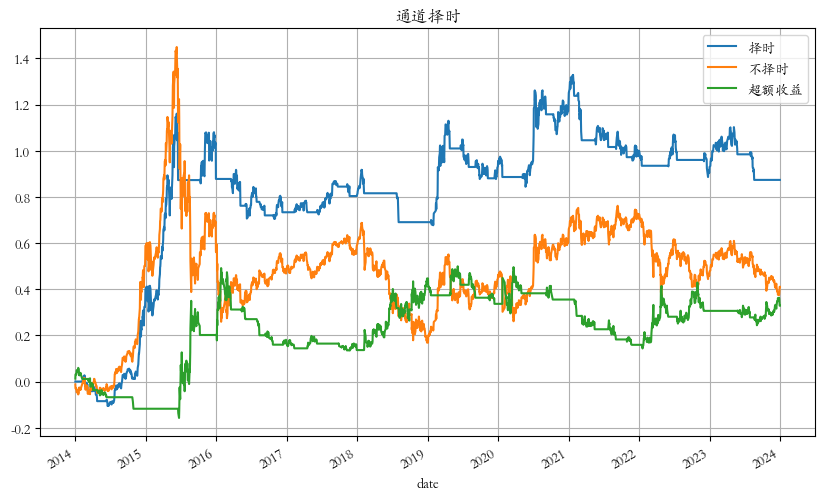

In [36]:
# 可视化输出
cumul_ret.plot(figsize=(10, 6), title='通道择时', grid=True)